In [1]:
from load_data import load_train, load_test, load_example


import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
import numpy as np

Using TensorFlow backend.


## Image recognition met een "normaal" neuraal netwerk. 

Neurale netwerken zijn ontzettend sterke wiskundige modellen. Een “normaal” neuraal netwerk heeft echter wel wat limieten. Om een aantal van deze limieten te doorbreken, kan je een convolutional neuraal netwerk gebruiken. 

We beginnen met het exploreren van de limieten van normale neurale netwerken, dit doen we doormiddel van de MNIST-dataset.

MNIST is een dataset van 70.000 handgeschreven cijfers (0..9), opgesplitst in 60.000 training images en 10.000 testing images. We hebben al functies geschreven waarmee je de data kan inladen, zie de cell hieronder.

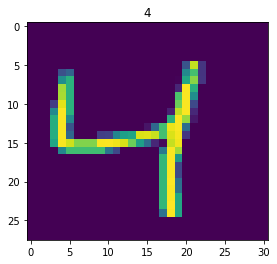

In [2]:
X_train, y_train = load_train()
X_train = (X_train / 255) - 0.5

plt.imshow(X_train[2])
plt.title(f"{y_train[2]}")
plt.show()

Dit is, uiteraard, een vier.

### Data formatting
Voordat we een neuraal netwerk kunnen trainen op de MNIST-data, moet deze verwerkt worden. De input van dit neuraal netwerk moet 1-dimensionaal zijn, momenteel is dat nog 2-dimensionaal. De labels hebben wij zelf al voor je verwerkt, probeer nu zelf X_train om te zetten naar een correct format.

In [3]:
y_train = to_categorical(y_train, 10)
X_train = np.asarray([[k for j in i for k in j] for i in X_train])

In [4]:
X_train.shape

(60000, 868)

Image recognition geeft in het algemeen ontzettend grote input vectors. MNIST is in grayscale, maar veel plaatjes zijn dat niet. Als je ook nog kleur wil meegeven, zou de input vector nog drie keer zo groot zijn.

### Bouwen van een NN

De volgende stap is om een neuraal netwerk te bouwen. Maak zelf de eerste Dense layer af, kijk vervolgens ook naar hoeveel hidden layers je toevoegt. Bij image recognition is de activation function ook erg belangrijk. Denk goed na over welke je gebruikt. De laatste layer geven wij alvast aan je. 


In [5]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1]))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                27808     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 28,138
Trainable params: 28,138
Non-trainable params: 0
_________________________________________________________________


Hieruit kan je al direct het eerste probleem van normale neurale netwerken inzien; er is een gigantische hoeveelheid trainbare parameters. 

Iedere node moet verbonden zijn aan iedere node. Bij image recognition is de input vector gigantisch, dit houdt dus ook in dat er een gigantische hoeveelheid weights zijn waarmee jouw neuraal netwerk rekening moet houden. 

Dit maakt het trainen best zwaar en langzaam. Ga nu door met het trainen van dit neuraal netwerk. Ook de `.compile()` hebben wij al aan je geven, ook hier mag je mee spelen.

Probeer jouw neuraal netwerk zo accuraat mogelijk te maken. (doe dit door te kijken naar de resultaten van de `.fit()`, `.evaluate()` komt later).

In [6]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.4434 - accuracy: 0.8685
Epoch 2/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.3414 - accuracy: 0.9014
Epoch 3/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.3255 - accuracy: 0.9072
Epoch 4/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.3163 - accuracy: 0.9089
Epoch 5/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3118 - accuracy: 0.9107
Epoch 6/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3048 - accuracy: 0.9128
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.3009 - accuracy: 0.9153
Epoch 8/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.2991 - accuracy: 0.9154
Epoch 9/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.2956 - accuracy: 0.9165
Epoch 10/10
60000/60000 [==============================

### Het evalueren van het neurale netwerk
Ook hier moet de data eerst nog omgevormd worden, gebruik hiervoor dezelfde code als bij de training data.

In [8]:
X_test, y_test = load_test()
X_test = np.asarray([[k for j in i for k in j] for i in X_test])
y_test = to_categorical(y_test, 10)

In [9]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 39us/step


[793.0278666015626, 0.4291999936103821]

### Huh?
Hoogstwaarschijnlijk scoort jouw neuraal netwerk nu ontzettend slecht. Om een limiet van neurale netwerken zichtbaar te maken, hebben we een klein beetje valsgespeeld. We hebben wat padding toegevoegd; een aantal pixels aan de linkerkant bij de testing data en een aantal pixels aan de rechterkant bij de training data. Zie de plots hieronder.

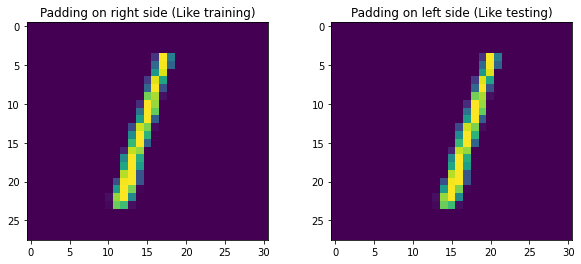

In [15]:
(example_r, example_l), label = load_example(index=2)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].imshow(example_r)
axs[0].set_title("Padding on right side (Like training)")

axs[1].imshow(example_l)
axs[1].set_title("Padding on left side (Like testing)")

plt.show()

De standaardwaarde voor de padding is 3(!!) pixels, dit heeft een gigantisch effect op de accuratesse. Formatteer nog één keer de data (`examples`), en kijk wat er uit de `.predict()` komt. 

Er bestaat een kans dat jouw model hier de goede voorspelt, probeer dan bij `load_example()` het argument `index` te veranderen naar een ander getal. Waarschijnlijk zal het dan wel fout voorspellen


In [16]:
examples = np.asarray([[k for j in i for k in j] for i in [example_r, example_l]])

In [17]:
model.predict_classes(examples)

array([1, 4], dtype=int64)

### Waarom?

De voorspellingen van een gewoon neuraal netwerk zijn ruimtelijk bepaald, het herkent patronen op specifieke plekken. Het verplaatsen van deze patronen met maar een paar pixels kan al genoeg zijn om het onmogelijk te maken voor een gewoon neuraal netwerk om deze te herkennen. 

Een neuraal netwerk getraind op het herkennen van honden en fietsen, zou heel makkelijk het volgende gedrag kunnen laten zien:



![Right!](src/top-left-dog.png)

![Wrong!](src/top-left-bike.png)


Speel is een beetje rond met de padding, kijk is hoeveel impact 4 pixels heeft, zelfs 1 pixel kan al een grote impact hebben!

Wij raden aan om alleen de horizontale padding te veranderen, het format van het padding argument in `load_train`, `load_test`, en `load_example` is dan: `((0, 0), (0, 0), (left sided padding, right sided padding))`.

- Aldewereld, H. & van der Bijl, B. & Bunk, J. (2017, oktober). Applied Artificial Intelligence. Geraadpleegd op 13 maart 2020, van https://canvas.hu.nl/courses/7569/files/694738/download?wrap=1

- Chollet, F. (2019, November 6). Getting started with the Keras Sequential model. Geraadpleegd op 13 maart 2020, van keras.io: https://keras.io/getting-started/sequential-model-guide/